
<div class="markdown-google-sans">
  <h2>Welcome to Ersilia on Google Colaboratory!</h1>
</div>

*   Follow the steps below to fetch, serve and predict/calculate your AI models.
*   For more detailed instructions, visit the Ersilia colab guide.

In [46]:
# @title 🏃‍♀️ Install Ersilia on Colab


%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [47]:
# @title 🔗 Connect Colab to your Google Drive

## Mount google drive
from google.colab import drive

drive.mount("/content/drive")

## Click on the folder/directory icon to the left
##      and make sure your drive is mounted

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div class="markdown-google-sans">

### 📩 Specify your file paths and the input .csv file
</div>

<div>

*  Make sure you have a .csv file containing a list of molecules represented as SMILES string
* Specify the exact column name of your smiles column in the .csv file
*  Specify the path to your file in Google Drive
*  Specify the path where you want to store the results in Google Drive

</div>

In [48]:
# specify your input folder

input_folder = "/content/drive/MyDrive/Ersilia"  # @param {type:"string"}

In [69]:
# specify your output folder

output_folder = "/content/output"  # @param {type:"string"}

In [50]:
# specify the name of your input csv file

input_filename = "eml_canonical"  # @param {type:"string"}

In [55]:
# specify the SMILES column name
smiles_column = "smiles"  # @param {type:"string"}

In [56]:
# @title 🔤 Extract SMILES to a list
import pandas as pd

#path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv("/content/reference_library.csv")
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 1000 SMILES


<div class="markdown-google-sans">

#### 🚀 Use the Ersilia Model Hub to run predictions for your molecules. Check all available models [here](https://ersilia.io/model-hub)
</div>

1. Enter the model name
2. Fetch models
3. Make predictions or calculations
4. Save the result to a .csv file in your google drive.

In [57]:
# Enter the model name
# This is just an example, make sure to adapt it to your specific model

model_name = "eos6oli"  # @param {type:"string"}

In [58]:
# @title 📥 Fetch the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-8c92cmni
Solving environment: - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2023.12.12 |       h06a4308_0 

In [59]:
# @title ⚙️ Serve the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:38765
   PID: 19019
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [60]:
# @title ⚡ Run predictions
api = "calculate"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 58.92 seconds


In [61]:
# @title ✔️ Check your results

print(output.head())

                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                               input  solubility  
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1      -3.454  
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1      -4.502  
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl      -2.900  
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...      -4.777  
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...      -4.473  


In [70]:
# @title 💾 Save your results in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)

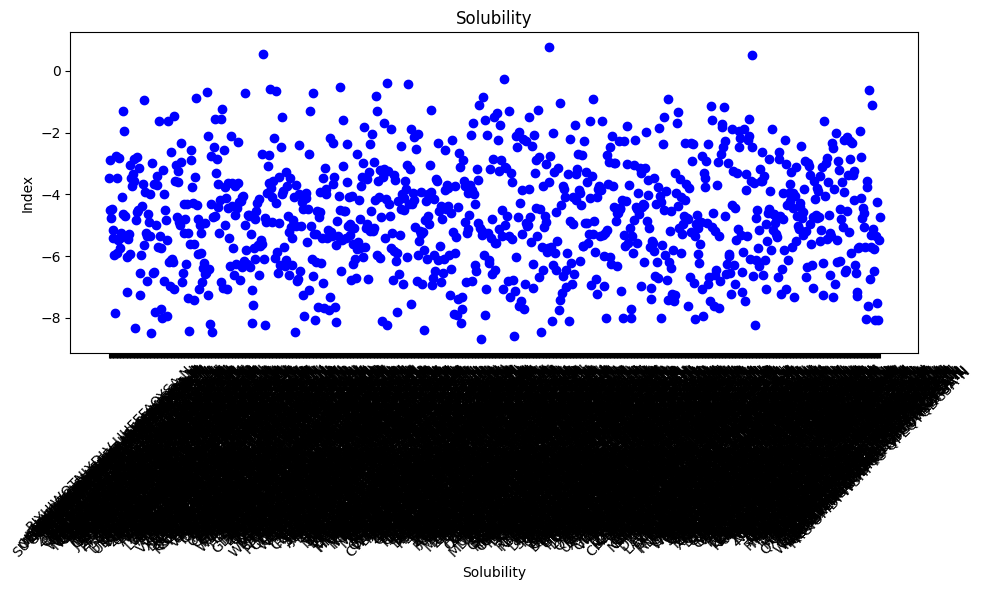

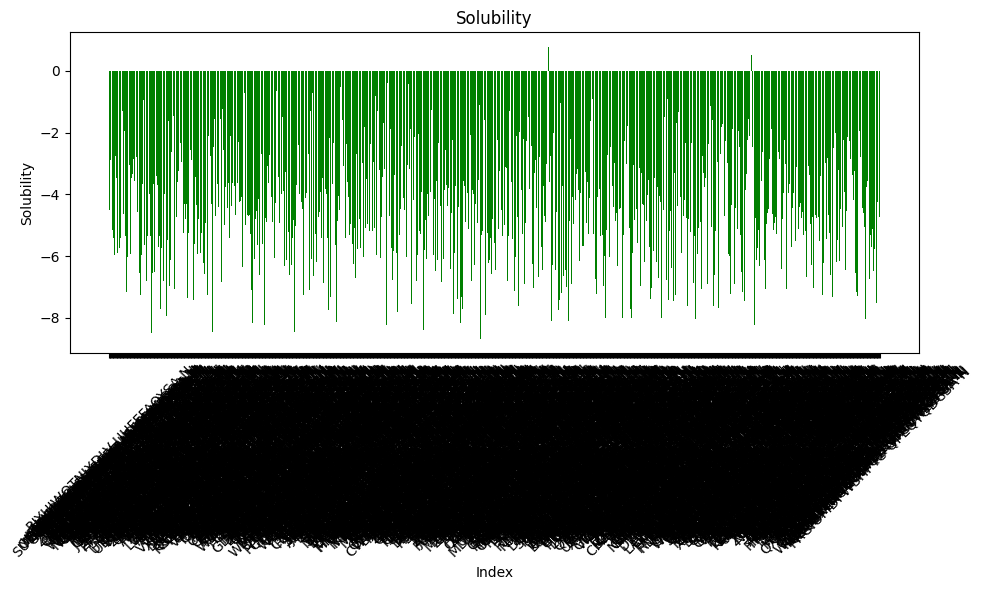

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv(output_path)  # Replace "your_file.csv" with the path to your CSV file

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['solubility'], color='blue')
plt.title('Solubility')
plt.xlabel('Index')
plt.ylabel('Solubility')
plt.xticks(data.index, data['key'], rotation=45)
plt.tight_layout()
plt.show()

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['solubility'], color='green')
plt.title('Solubility')
plt.xlabel('Index')
plt.ylabel('Solubility')
plt.xticks(data.index, data['key'], rotation=45)
plt.tight_layout()
plt.show()

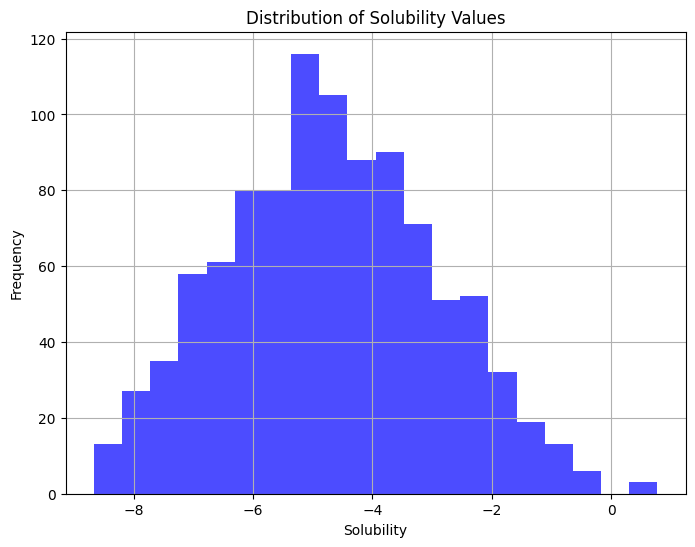

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the output data from the saved CSV file
output_path = "/content/output/eos6oli_output.csv"  # Update this with the correct path
output = pd.read_csv(output_path)

# Extract the solubility values from the DataFrame
solubility_values = output['solubility']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(solubility_values, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Solubility Values')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

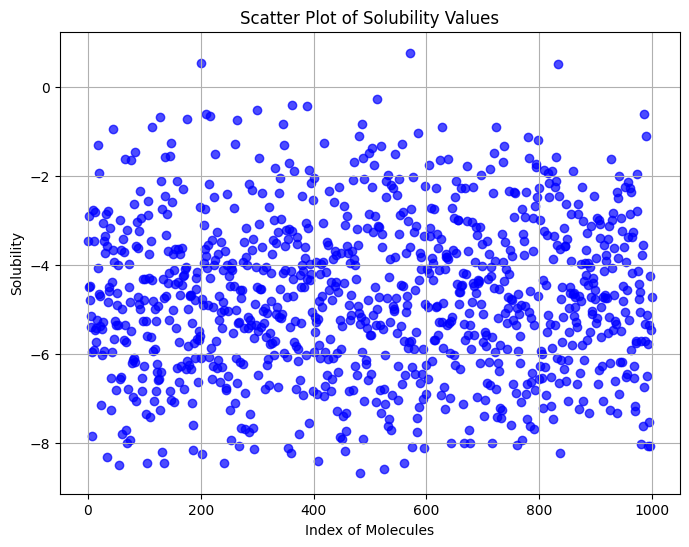

In [77]:
# Extract the solubility values from the DataFrame
solubility_values = output['solubility']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(output.index, solubility_values, color='blue', alpha=0.7)
plt.title('Scatter Plot of Solubility Values')
plt.xlabel('Index of Molecules')
plt.ylabel('Solubility')
plt.grid(True)
plt.show()